In [1]:
#load in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in data
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [ ]:
airbnb['price'].mean() #population mean

249.16526273565984

In [26]:
#np.random.seed(100)
airbnb.sample(n=40)["price"].mean() #point estimate

244.45

In [42]:
sample_list = []
for i in range(5_000):
    sample = airbnb.sample(n=40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)

In [43]:
samples = pd.concat(sample_list)
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
3631,7.660000e+17,Renfrew-Collingwood,Entire home/apt,2,1.0,1.0,1.0,276,0
756,1.925070e+07,Grandview-Woodland,Entire home/apt,2,NaN,2.0,NaN,107,0
4005,8.490000e+17,Victoria-Fraserview,Private room,1,1.0,1.0,1.0,321,0
2710,5.351436e+07,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,200,0
3673,7.740000e+17,Downtown Eastside,Private room,2,2.0,2.0,2.0,280,0
...,...,...,...,...,...,...,...,...,...
2063,4.286598e+07,Grandview-Woodland,Entire home/apt,4,NaN,1.0,NaN,163,4999
1244,2.779124e+07,West End,Entire home/apt,5,2.0,3.0,3.0,127,4999
1521,3.388516e+07,Dunbar Southlands,Private room,2,NaN,1.0,NaN,139,4999
1474,3.298243e+07,South Cambie,Entire home/apt,4,NaN,2.0,NaN,137,4999


In [44]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean")

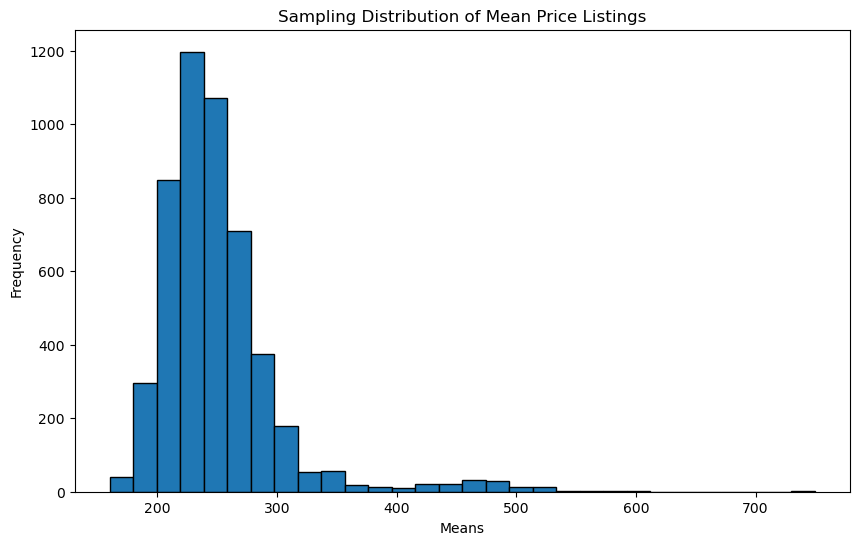

In [45]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [46]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)

In [47]:
one_sample["price"].mean()

219.85

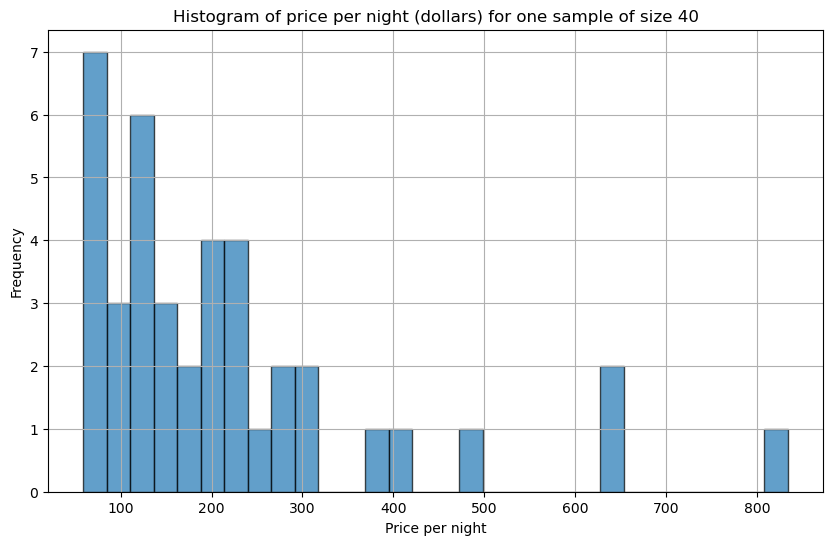

In [48]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()


In [49]:
boot1 = one_sample.sample(frac=1,replace=True)

In [61]:
boot1

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
3017,6.310000e+17,West End,Entire home/apt,2,1.0,1.0,0.0,223
608,1.554257e+07,Kitsilano,Entire home/apt,5,1.0,2.0,3.0,99
240,5.347437e+06,Downtown,Entire home/apt,3,1.0,2.0,2.0,69
361,8.429321e+06,Fairview,Entire home/apt,4,1.0,1.0,1.0,79
149,3.100878e+06,Downtown,Entire home/apt,2,1.0,1.0,0.0,60
1465,3.287258e+07,Kitsilano,Entire home/apt,4,2.0,2.0,2.0,136
3599,7.590000e+17,Kensington-Cedar Cottage,Entire home/apt,8,NaN,3.0,NaN,273
548,1.455531e+07,Grandview-Woodland,Entire home/apt,2,NaN,1.0,NaN,95
240,5.347437e+06,Downtown,Entire home/apt,3,1.0,2.0,2.0,69
1619,3.519493e+07,West End,Entire home/apt,3,1.0,1.0,2.0,143


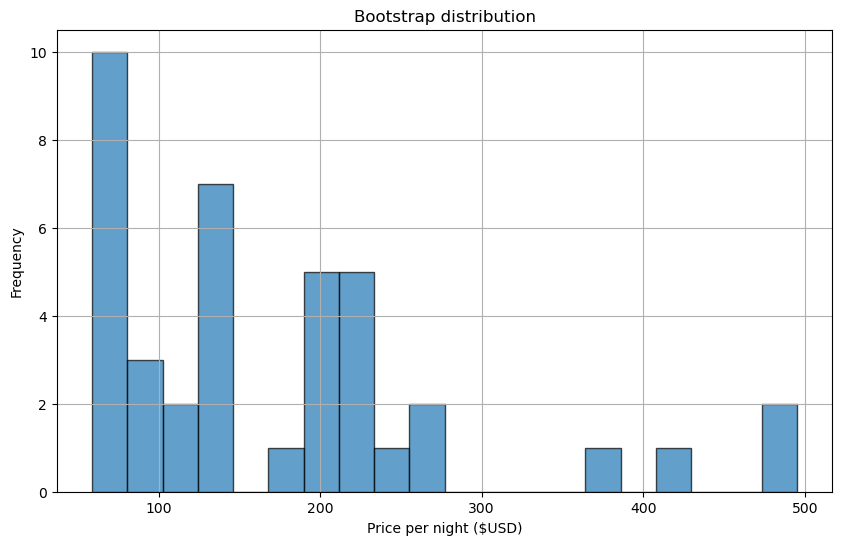

In [50]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [53]:
bootstrap_samples = []

for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace = True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)

In [54]:
boot2000 = pd.concat(bootstrap_samples)

In [55]:
boot2000

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
3076,6.440000e+17,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,227,0
988,2.348250e+07,Fairview,Entire home/apt,2,1.0,1.0,1.0,118,0
4883,9.790000e+17,Downtown Eastside,Entire home/apt,7,2.0,3.0,4.0,834,0
3851,8.160000e+17,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,2.0,300,0
273,6.315732e+06,Fairview,Entire home/apt,3,1.0,1.0,2.0,70,0
...,...,...,...,...,...,...,...,...,...
2480,5.073003e+07,Oakridge,Entire home/apt,3,NaN,2.0,NaN,188,19999
4255,8.910000e+17,Downtown Eastside,Entire home/apt,4,1.0,0.0,0.0,372,19999
391,9.636681e+06,Downtown Eastside,Entire home/apt,2,NaN,1.0,NaN,80,19999
988,2.348250e+07,Fairview,Entire home/apt,2,1.0,1.0,1.0,118,19999


In [58]:
boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name="mean_price")

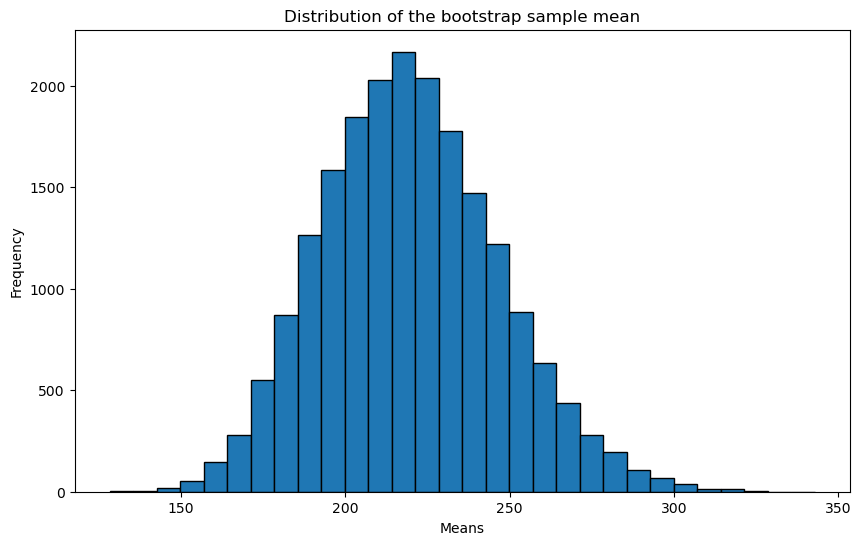

In [59]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [60]:
ci_bounds = boot_means["mean_price"].quantile([0.025,0.975])
ci_bounds

0.025    171.150
0.975    276.525
Name: mean_price, dtype: float64